In [1]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#load data
jan_data = pd.read_csv('../Project1_Resources/Jan_mci_data.csv')
feb_data = pd.read_csv('../Project1_Resources/Feb_mci_data.csv')
mar_data = pd.read_csv('../Project1_Resources/Mar_mci_data.csv')
apr_data = pd.read_csv('../Project1_Resources/Apr_mci_data.csv')
apr_data = apr_data.drop(columns='Unnamed: 0')
may_data = pd.read_csv('../Project1_Resources/May_mci_data.csv')
may_data = may_data.drop(columns='Unnamed: 0')
jun_data = pd.read_csv('../Project1_Resources/Jun_mci_data.csv')
jul_data = pd.read_csv('../Project1_Resources/Jul_mci_data.csv')
aug_data = pd.read_csv('../Project1_Resources/Aug_mci_data.csv')
aug_data = aug_data.drop(columns='Unnamed: 0')
sep_data = pd.read_csv('../Project1_Resources/Sep_mci_data.csv')
sep_data = sep_data.drop(columns='Unnamed: 0')

In [3]:
#combine into one dataset
data_three_quarters = jan_data.copy()
data_three_quarters = data_three_quarters.drop(columns="Unnamed: 0")
data_three_quarters = data_three_quarters.drop(columns="Unnamed: 0.1")
data_three_quarters = pd.concat([data_three_quarters,feb_data,mar_data,apr_data,may_data,aug_data,sep_data,jul_data,jun_data],axis=0)

In [4]:
data_three_quarters.to_csv('../Project1_Resources/three_quarters_mci_data.csv',index=False)

In [5]:
#create my own copy
data = data_three_quarters

In [6]:
# add Airline column
data["Airline"] = data["Marketing_Airline_Network"]

# rename Airline values from their shortcode to their full name
data["Airline"] = data["Airline"].replace({"AA" : "American Airlines",
                         "AS" : "Alaska Airlines",
                         "B6" : "JetBlue Airways",
                         "DL" : "Delta Air Lines",
                         "F9" : "Frontier Airlines",
                         "G4" : "Allegient Air",
                         "HA" : "Hawaiian Airlines",
                         "NK" : "Spirit Airlines",
                         "UA" : "United Airlines",
                         "VX" : "Virgin America",
                         "WN" : "Southwest Airlines"
                        })

In [7]:
# create outbound flight database 
OutboundData = data.loc[(data["Origin"]) == "MCI"]
# OutboundData

# create inbound flight database
InboundData = data.loc[(data["Dest"]) == "MCI"]
# InboundData

In [8]:
# get a count of Outbound Flights out of MCI
OutboundFlightCount = len(OutboundData["Month"])
# OutboundFlightCount

#get a count of Inbound Flights to MCI
InboundFlightCount = len(InboundData["Month"])
# InboundFlightCount

In [9]:
#get value counts of outbound flights by Airline
OutboundFlightValueCounts = [OutboundData["Airline"].value_counts()]
# OutboundFlightValueCounts

#get value counts of inbound flights by Airline
InboundFlightValueCounts = [InboundData["Airline"].value_counts()]
# InboundFlightValueCounts

In [10]:
#create OutboundTable to show percentage of overall outbound flights by Airline
OutboundTable = pd.DataFrame(OutboundFlightValueCounts).transpose()
OutboundTable["% of Total Flights"] = (OutboundTable["Airline"] / OutboundFlightCount) * 100
OutboundTable.style.format({'% of Total Flights': '{:.2%}'.format})
OutboundTable.rename({"Airline" : "# of Total Flights"}, axis=1, inplace=True)
# OutboundTable

In [11]:
#create InboundTable to show percentage of overall inbound flights by Airline
InboundTable = pd.DataFrame(InboundFlightValueCounts).transpose()
InboundTable["% of Total Flights"] = (InboundTable["Airline"] / InboundFlightCount) * 100
InboundTable.rename({"Airline" : "# of Total Flights"}, axis=1, inplace=True)
# InboundTable

In [12]:
# OutboundTable["# of Flights Delayed"] = ""
OutboundTable.rename({"% of Total Flights" : "% of MCI Outbound Flights"}, axis=1, inplace=True)


# InboundTable["# of Flights Delayed"] = ""
InboundTable.rename({"% of Total Flights" : "% of MCI Inbound Flights"}, axis=1, inplace=True)

In [13]:
OnlyOutboundDelays = OutboundData.loc[(OutboundData["DepDelayMinutes"]) > 0]
OutboundDelays = OnlyOutboundDelays["Airline"].value_counts()
OutboundTable["# of Flights Delayed"] = OutboundDelays

In [14]:
OnlyInboundDelays = InboundData.loc[(InboundData["DepDelayMinutes"]) > 0]
InboundDelays = OnlyInboundDelays["Airline"].value_counts()
InboundTable["# of Flights Delayed"] = InboundDelays

In [15]:
OutboundTable["% of Flights Delayed"] = ((OutboundTable["# of Flights Delayed"] / OutboundTable["# of Total Flights"]) * 100)
OutboundTable.sort_index(inplace=True)
OutboundTable

,# of Total Flights,% of MCI Outbound Flights,# of Flights Delayed,% of Flights Delayed
Alaska Airlines,1148,2.720959,306,26.655052
Allegient Air,211,0.500107,73,34.597156
American Airlines,6945,16.460857,1814,26.119510
Delta Air Lines,7996,18.951909,1965,24.574787
Frontier Airlines,246,0.583063,107,43.495935
Southwest Airlines,18516,43.886137,7474,40.365090
Spirit Airlines,1174,2.782584,367,31.260647
United Airlines,5955,14.114385,1464,24.584383


In [16]:
InboundTable["% of Flights Delayed"] = ((InboundTable["# of Flights Delayed"] / InboundTable["# of Total Flights"]) * 100)
InboundTable.sort_index(inplace=True)
InboundTable

,# of Total Flights,% of MCI Inbound Flights,# of Flights Delayed,% of Flights Delayed
Alaska Airlines,1173,2.778041,358,30.520034
Allegient Air,211,0.499716,68,32.227488
American Airlines,6946,16.450360,2174,31.298589
Delta Air Lines,7994,18.932361,2371,29.659745
Frontier Airlines,246,0.582607,101,41.056911
Southwest Airlines,18520,43.861311,8202,44.287257
Spirit Airlines,1175,2.782778,293,24.936170
United Airlines,5959,14.112827,1818,30.508475


In [17]:
OnlyOutboundDelays
AvgOutboundDelays = pd.DataFrame(OnlyOutboundDelays.groupby('Airline')['DepDelayMinutes'].mean())

AvgOutboundDelays

,DepDelayMinutes
Airline,
Alaska Airlines,27.558824
Allegient Air,54.301370
American Airlines,49.214443
Delta Air Lines,47.594402
Frontier Airlines,65.224299
Southwest Airlines,24.303318
Spirit Airlines,34.250681
United Airlines,66.744536


In [18]:
OnlyInboundDelays
AvgInboundDelays = pd.DataFrame(OnlyInboundDelays.groupby('Airline')['DepDelayMinutes'].mean())
AvgInboundDelays

,DepDelayMinutes
Airline,
Alaska Airlines,26.293296
Allegient Air,34.044118
American Airlines,41.339006
Delta Air Lines,41.850274
Frontier Airlines,61.059406
Southwest Airlines,26.073519
Spirit Airlines,35.529010
United Airlines,56.199670


In [19]:
AvgDelays = pd.DataFrame(AvgOutboundDelays)
# AvgDelays.rename({"DepDelayMinues" : "Average Outbound Delay (minutes)"}, axis=1, inplace=True)


In [20]:
AvgDelays

,DepDelayMinutes
Airline,
Alaska Airlines,27.558824
Allegient Air,54.301370
American Airlines,49.214443
Delta Air Lines,47.594402
Frontier Airlines,65.224299
Southwest Airlines,24.303318
Spirit Airlines,34.250681
United Airlines,66.744536


In [25]:
AvgDelays.columns = ["Avg. Outbound Delay (minutes)"]
AvgDelays["Avg. Inbound Delay (minutes)"] = AvgInboundDelays
AvgDelays

,Avg. Outbound Delay (minutes),Avg. Inbound Delay (minutes)
Airline,,
Alaska Airlines,27.558824,26.293296
Allegient Air,54.301370,34.044118
American Airlines,49.214443,41.339006
Delta Air Lines,47.594402,41.850274
Frontier Airlines,65.224299,61.059406
Southwest Airlines,24.303318,26.073519
Spirit Airlines,34.250681,35.529010
United Airlines,66.744536,56.199670


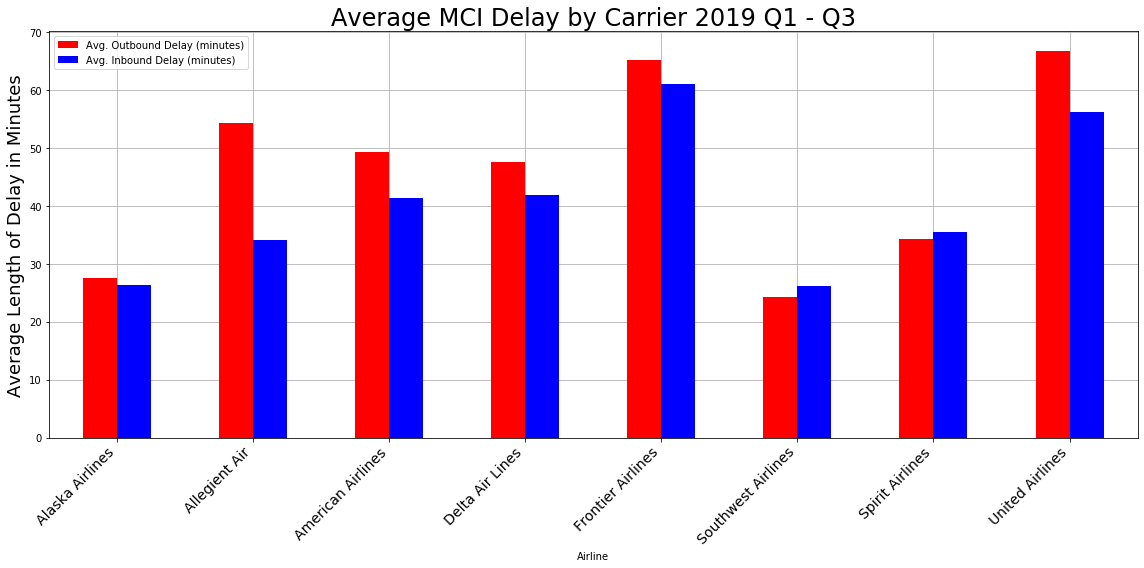

In [39]:
AvgDelays_plot = AvgDelays.plot(kind="bar", figsize=(16,8), zorder=2, color=("red", "blue"))
plt.grid()
plt.title("Average MCI Delay by Carrier 2019 Q1 - Q3" , fontsize=24,)
plt.ylabel("Average Length of Delay in Minutes", fontsize = 18)
plt.xticks(fontsize = 14, rotation = 45, ha='right')
plt.tight_layout()
plt.savefig("AvgDelay.png")
plt.show()

In [29]:
OutboundCarrierDelays = OutboundData.loc[(OutboundData["CarrierDelay"]) > 0]
OutboundCarrierDelays

,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
4617,1,30,3,DL,MCI,"Kansas City, MO",LAX,"Los Angeles, CA",72.0,91.0,0.0,72.0,0.0,19.0,0.0,0.0,Delta Air Lines
4619,1,30,3,DL,MCI,"Kansas City, MO",MSP,"Minneapolis, MN",282.0,285.0,0.0,282.0,0.0,3.0,0.0,0.0,Delta Air Lines
4736,1,21,1,DL,MCI,"Kansas City, MO",DTW,"Detroit, MI",183.0,176.0,0.0,2.0,0.0,0.0,0.0,174.0,Delta Air Lines
4755,1,22,2,DL,MCI,"Kansas City, MO",ATL,"Atlanta, GA",39.0,28.0,0.0,28.0,0.0,0.0,0.0,0.0,Delta Air Lines
4761,1,23,3,DL,MCI,"Kansas City, MO",SLC,"Salt Lake City, UT",130.0,122.0,0.0,8.0,0.0,0.0,0.0,114.0,Delta Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,6,14,5,UA,MCI,"Kansas City, MO",IAD,"Washington, DC",1040.0,1036.0,0.0,1036.0,0.0,0.0,0.0,0.0,United Airlines
4751,6,4,2,UA,MCI,"Kansas City, MO",IAD,"Washington, DC",767.0,766.0,0.0,766.0,0.0,0.0,0.0,0.0,United Airlines
4785,6,28,5,G4,MCI,"Kansas City, MO",PGD,"Punta Gorda, FL",344.0,338.0,0.0,338.0,0.0,0.0,0.0,0.0,Allegient Air
4804,6,19,3,G4,MCI,"Kansas City, MO",VPS,"Valparaiso, FL",19.0,61.0,0.0,19.0,0.0,42.0,0.0,0.0,Allegient Air


In [30]:
InboundCarrierDelays = InboundData.loc[(InboundData["CarrierDelay"]) > 0]
InboundCarrierDelays

,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
1,1,10,4,UA,ORD,"Chicago, IL",MCI,"Kansas City, MO",60.0,48.0,0.0,48.0,0.0,0.0,0.0,0.0,United Airlines
55,1,7,1,DL,LAX,"Los Angeles, CA",MCI,"Kansas City, MO",22.0,24.0,0.0,22.0,0.0,2.0,0.0,0.0,Delta Air Lines
78,1,30,3,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",19.0,21.0,0.0,19.0,0.0,2.0,0.0,0.0,Delta Air Lines
107,1,2,3,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",36.0,25.0,0.0,2.0,0.0,0.0,0.0,23.0,Delta Air Lines
144,1,15,2,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",21.0,16.0,0.0,16.0,0.0,0.0,0.0,0.0,Delta Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,6,13,4,UA,IAH,"Houston, TX",MCI,"Kansas City, MO",98.0,91.0,0.0,91.0,0.0,0.0,0.0,0.0,United Airlines
9599,6,5,3,UA,IAH,"Houston, TX",MCI,"Kansas City, MO",57.0,54.0,0.0,54.0,0.0,0.0,0.0,0.0,United Airlines
9624,6,14,5,G4,PGD,"Punta Gorda, FL",MCI,"Kansas City, MO",235.0,227.0,0.0,178.0,0.0,0.0,0.0,49.0,Allegient Air
9631,6,15,6,G4,SFB,"Sanford, FL",MCI,"Kansas City, MO",54.0,51.0,0.0,6.0,0.0,0.0,0.0,45.0,Allegient Air


In [31]:
OutboundCarrierDelayValueCounts = OutboundCarrierDelays["Airline"].value_counts()
OutboundTable["# of Carrier Delays"] = OutboundCarrierDelayValueCounts
OutboundTable["% of Flights w/ a Carrier Delay"] = ((OutboundTable["# of Carrier Delays"] / OutboundTable["# of Total Flights"]) * 100)
OutboundTable["% of Delays due to Carrier Delay"] = ((OutboundTable["# of Carrier Delays"] / OutboundTable["# of Flights Delayed"]) * 100)
OutboundTable

,# of Total Flights,% of MCI Outbound Flights,# of Flights Delayed,% of Flights Delayed,# of Carrier Delays,% of Flights w/ a Carrier Delay,% of Delays due to Carrier Delay
Alaska Airlines,1148,2.720959,306,26.655052,42,3.658537,13.725490
Allegient Air,211,0.500107,73,34.597156,12,5.687204,16.438356
American Airlines,6945,16.460857,1814,26.119510,378,5.442765,20.837927
Delta Air Lines,7996,18.951909,1965,24.574787,378,4.727364,19.236641
Frontier Airlines,246,0.583063,107,43.495935,25,10.162602,23.364486
Southwest Airlines,18516,43.886137,7474,40.365090,1509,8.149708,20.189992
Spirit Airlines,1174,2.782584,367,31.260647,98,8.347530,26.702997
United Airlines,5955,14.114385,1464,24.584383,253,4.248531,17.281421


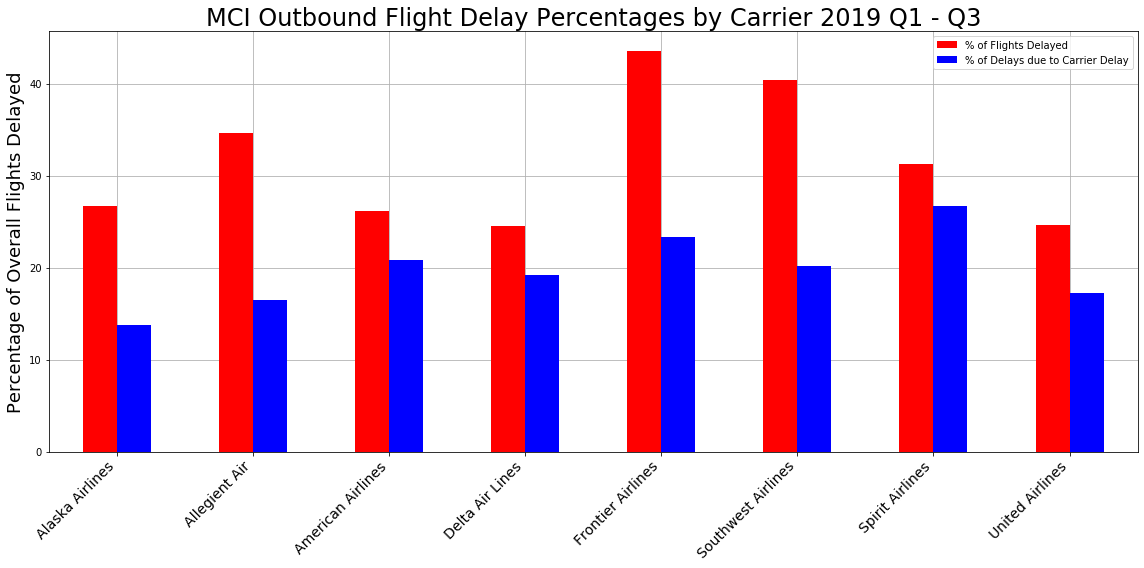

In [38]:
Outbound_plot3 = OutboundTable[["% of Flights Delayed", "% of Delays due to Carrier Delay"]].plot(kind="bar", figsize=(16,8), zorder=2, color=("red", "blue"))
plt.grid()
plt.title("MCI Outbound Flight Delay Percentages by Carrier 2019 Q1 - Q3" , fontsize=24,)
plt.ylabel("Percentage of Overall Flights Delayed", fontsize = 18)
plt.xticks(fontsize = 14, rotation = 45, ha='right')
plt.tight_layout()
plt.savefig("Outbound.png")
plt.show()

In [36]:
InboundCarrierDelayValueCounts = InboundCarrierDelays["Airline"].value_counts()
InboundTable["# of Carrier Delays"] = InboundCarrierDelayValueCounts
InboundTable["% of Flights w/ a Carrier Delay"] = (InboundTable["# of Carrier Delays"] / InboundTable["# of Total Flights"]) * 100
InboundTable["% of Delays due to Carrier Delay"] = ((InboundTable["# of Carrier Delays"] / InboundTable["# of Flights Delayed"]) * 100)
InboundTable

,# of Total Flights,% of MCI Inbound Flights,# of Flights Delayed,% of Flights Delayed,# of Carrier Delays,% of Flights w/ a Carrier Delay,% of Delays due to Carrier Delay
Alaska Airlines,1173,2.778041,358,30.520034,87,7.416880,24.301676
Allegient Air,211,0.499716,68,32.227488,17,8.056872,25.000000
American Airlines,6946,16.450360,2174,31.298589,823,11.848546,37.856486
Delta Air Lines,7994,18.932361,2371,29.659745,736,9.206905,31.041755
Frontier Airlines,246,0.582607,101,41.056911,52,21.138211,51.485149
Southwest Airlines,18520,43.861311,8202,44.287257,2114,11.414687,25.774201
Spirit Airlines,1175,2.782778,293,24.936170,59,5.021277,20.136519
United Airlines,5959,14.112827,1818,30.508475,673,11.293841,37.018702


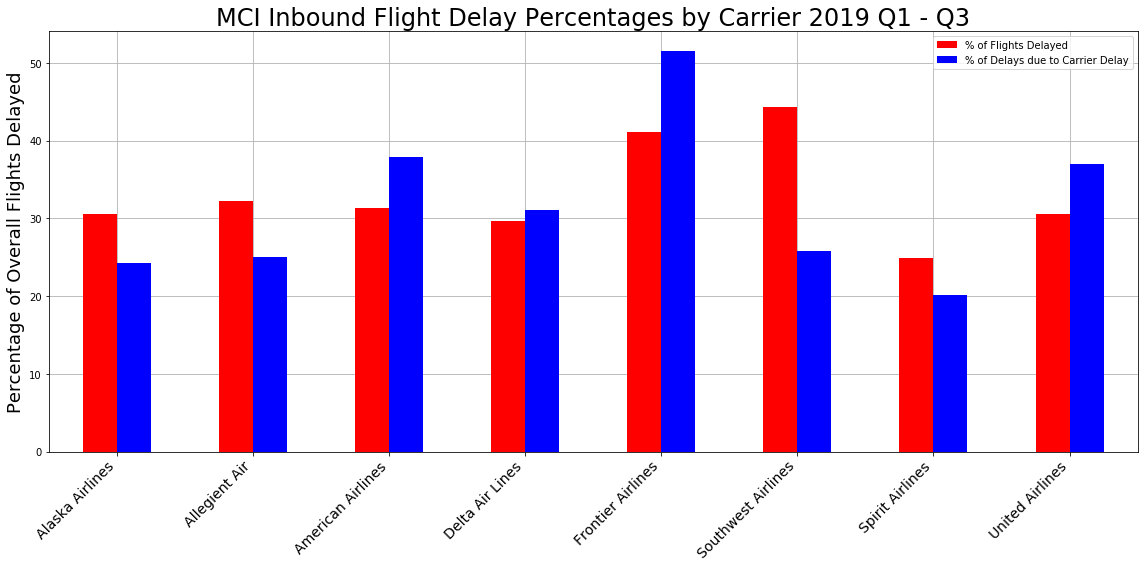

In [37]:
Inbound_plot3 = InboundTable[["% of Flights Delayed", "% of Delays due to Carrier Delay"]].plot(kind="bar", figsize=(16,8), zorder=2, color=("red", "blue"))
plt.grid()
plt.title("MCI Inbound Flight Delay Percentages by Carrier 2019 Q1 - Q3" , fontsize=24,)
plt.ylabel("Percentage of Overall Flights Delayed", fontsize = 18)
plt.xticks(fontsize = 14, rotation = 45, ha='right')
plt.tight_layout()
plt.savefig("Inbound.png")
plt.show()